# Table of Contents

01. Importing Libraries
02. Importing Data (fully merged)
03. Bar Chart
04. Histogram
05. Scatterplot
06. Line Chart
07. Order Hour of Day Histogram
08. Loyalty Flag Bar Chart
09. Expenditures by hour of day Line Chart
10. Age vs Family Situation Line Chart
11. Age vs Income Scatterplot

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
#Define path 
path = r'C:\Users\legra\Desktop\06-2022 Instacart Basket Analysis'

In [3]:
ords_prods_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'full_merge.pkl'))

In [4]:
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_cust.shape

(32404859, 33)

## 03. Bar Chart

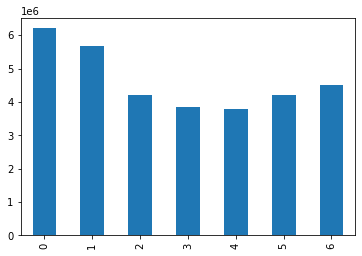

In [7]:
bar = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar(title = 'Orders by day of Week')

In [8]:
#Saving viz

bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_orders_dow.png'))

## 04. Histogram

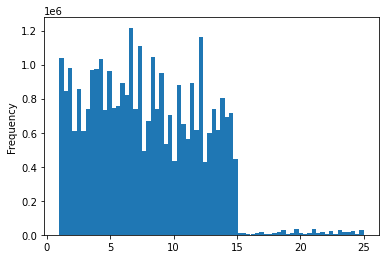

In [12]:
hist = ords_prods_cust['prices'].plot.hist(bins = 70)

In [13]:
#save viz

hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_prices.png'))

## 05. Scatterplot

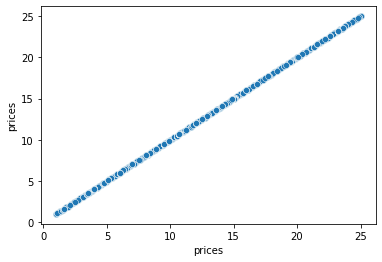

In [15]:
scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

In [18]:
#save viz

scat.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_prices.png'))

## 06. Line Chart

In [19]:
#Create a list holding true/false values to the test np.random.rant() <=0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <=0.7

Splitting Dataframe

In [20]:
#store 70% of the sample in the dataframe big

big = ords_prods_cust[dev]

In [21]:
#store 30% of the sample in the dataframe small

small = ords_prods_cust[~dev]

Comparing dataframes

In [22]:
len(ords_prods_cust)

32404859

In [23]:
len(big) + len(small)

32404859

In [24]:
df_2 = small[['orders_day_of_week', 'prices']]

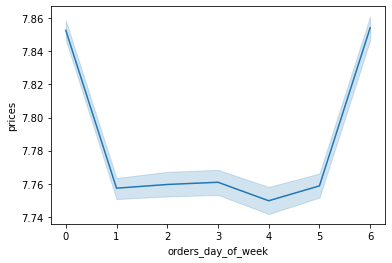

In [25]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [26]:
#save viz

line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_prices_dow'))

---- Task 4.9 Part 2 ----

## 07. Order hour of day histogram

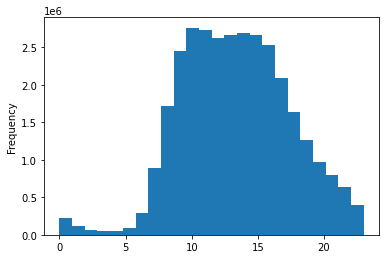

In [41]:
hist2 = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows that orders start to ramp up after 5 with mjajority of orders taking place between 10am and 3pm after which order volume is on a steady decline

In [42]:
#save viz

hist2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

## 08. Loyalty Flag bar chart

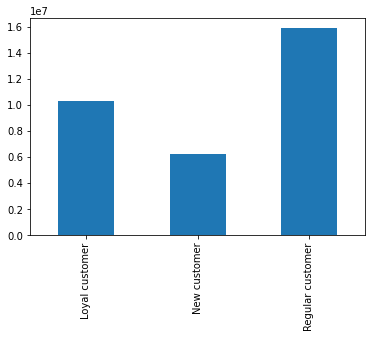

In [30]:
bar2 = ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar()

In [37]:
#save viz

bar2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

## 09. Expenditures by hour of day Line Chart

In [29]:
#Reducing sample

df_3 = small[['order_hour_of_day', 'prices']]

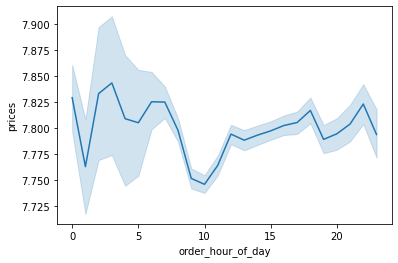

In [32]:
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [38]:
#save viz

line2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_expend_hours'))

## 10. Age vs Family situation line chart

In [33]:
#Reducing sample

df_4 = small[['age', 'number_of_dependants']]

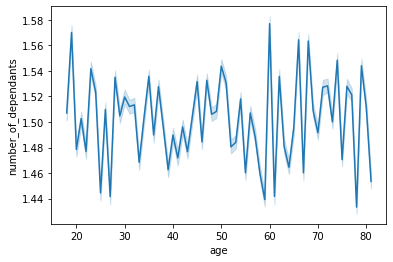

In [34]:
line3 = sns.lineplot(data = df_4, x = 'age',y = 'number_of_dependants')

The line chart shows that there is no clear trend between age and number of dependants

In [39]:
#save viz

line3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_vs_family_line'))

## 11. Age vs Income Scatterplot

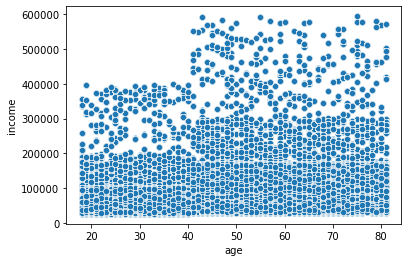

In [35]:
scat2 = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_cust)

The scatterplot shows that for individuals under 40, majority of the incoe is 200k and lower with nobody having income over 400k. After 40, most individuals earn 330k or less but the higher income earners earning close to 600k.

In [40]:
#save viz

scat2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_age_vs_income.png'))